In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
np.random.seed(7)
top_words = 5000 #상위 단어 5000개
#학습용,검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [2]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정
# 길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
# create the model
embedding_vecor_length = 32 #벡터사이즈
model = Sequential()
#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
391/391 [==============================] - 14s 31ms/step - loss: 0.4751 - accuracy: 0.7668
Epoch 2/10
391/391 [==============================] - 12s 32ms/step - loss: 0.2960 - accuracy: 0.8818
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2538 - accuracy: 0.9027
Epoch 4/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2965 - accuracy: 0.8791
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.2073 - accuracy: 0.9199
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 0.1804 - accuracy: 0.9312
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.1553 - accuracy: 0.9426
Epoch 8/10
391/391 [==============================] - 12s 31ms/step - loss: 0.1418 - accuracy: 0.9468
Epoch 9/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1184 - accuracy: 0.9564
Epoch 10/10
391/391 [==============================] - 28s 72ms/step - loss: 0.109

In [5]:
# Final evaluation of the model
scores = model.evaluate(X_train, y_train, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 15s 19ms/step - loss: 0.0680 - accuracy: 0.9788
Accuracy: 97.88%


In [6]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 8s 10ms/step - loss: 0.4727 - accuracy: 0.8626
Accuracy: 86.26%


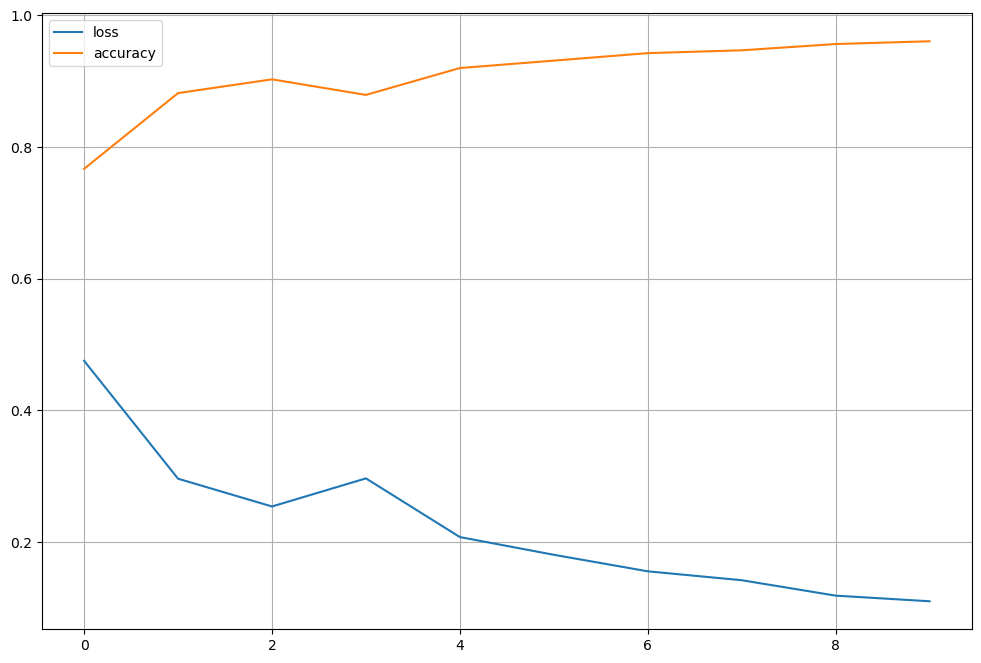

In [7]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()